In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np

### 1. Read in MNIST data

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


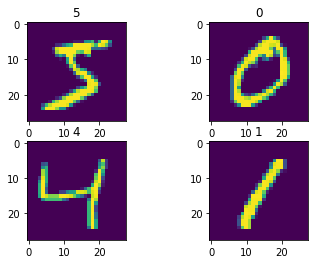

In [2]:
path = 'C:/Users/29578/Downloads/penn state/2020 Spring/PHS 597 Deep Learning/data/mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
fig, axs = plt.subplots(2,2)
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(train_images[ii*2+jj,:,:])
        axs[ii,jj].title.set_text(train_labels[ii*2+jj]) #show title: the label
##print(range(0,2))
##plt.show()

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
#from tensorflow.keras import backend

In [22]:
?models.Sequential
?layers.Dense

In [4]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#512: self-determined as dimension of output vector. 28*28 pixels. 
network.add(layers.Dense(10, activation='softmax'))
#10: self-determined dimension of output.10 categories of labels: 0,1,...9

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
network.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(512, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>]

In [6]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### 2. Reshape and Normalization

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
#?to_categorical:convert a class vector to binary class matrix
#test agreement of train and test: 10 rows of categories, 2 columns for train and test

### 3. Run NN model

In [10]:
network.fit(train_images, train_labels_cat, epochs=5, batch_size=128)
#x:input data. y: target data
#batch size: self-determined. # of smples per gradient update. # of figures used to train NN
#epoch: integer. # of epoches to train the model. an epoch is an iteration over the entire data.

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 58s 958us/sample - loss: 0.2547 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 25s 413us/sample - loss: 0.1038 - acc: 0.9689 - loss: 0.1046 
Epoch 3/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0685 - acc: 0.9802
Epoch 4/5
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0504 - acc: 0.9847 - loss: - ETA: 5s -  - ETA: 1
Epoch 5/5
60000/60000 [==============================] - 16s 260us/sample - loss: 0.0377 - acc: 0.9891


### 4. Test model (accuracy)

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels_cat)
print(test_acc)
#test_acc: accuracy of prediction compared with the truth

10000/10000 [==============================] - 7s 719us/sample - loss: 0.0682 - acc: 0.98050s - loss: 0.0928 - - E
0.9805


### Five Machine Learning Models were implemented to MNIST dataset. The accuracy of prediction for the five models was compared with NN example (accuracy=0.9805).
    Model 1: Support Vector Machine (SVM). Accuracy=0.9786
    Model 2: Random Forest. Accuracy=0.9715
    Model 3: K-Nearest Neighbors. Accuracy=0.9688
    Model 4: multinomial logistic with L2 penalty. Accuracy=0.8978 
    Model 5: Neural Network. (This multi-layer Perceptron classifier optimizes the log-loss function using LBFGS). Accuracy=0.981
   
An example of cross-validation and grid search was offered at the end to train hyperparameters in the models.

### Method 1: Support Vector Machine (SVM)

In [6]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import pandas as pd
import random

In [7]:
train_images1 = train_images[1:5001,]
train_labels1 = train_labels[1:5001,]
test_images1 = test_images[1:1001,]
test_labels1 = test_labels[1:1001,]
print(train_images1.shape)
print(train_labels1.shape)

(5000, 784)
(5000,)


In [114]:
# Kernel Function Selection. use 5000 images for training and 100 for testing
# 1. linear model. SVC(kernel='linear') accuracy: 0.889 
# 2. nonlinear model. SVC(kernel='poly',gamma="scale") accuracy: 0.92
# 2.1 nonlinear model. SVC(kernel='poly',gamma="scale",C=10) accuracy: 0.925
# 3. nonlinear model. SVC(C=15, gamma=0.001, kernel="rbf") accuracy: 0.917
random.seed(1)
np.random.seed(1)
model_linear = SVC(kernel='poly',gamma="scale",C=10)
model_linear.fit(train_images1, train_labels1)
test_pred = model_linear.predict(test_images1)
print("accuracy:", metrics.accuracy_score(y_true=test_labels1, y_pred=test_pred), "\n")

accuracy: 0.925 



In [62]:
model_linear = SVC(kernel='poly',gamma="scale",C=10)
model_linear.fit(train_images, train_labels)
# accuracy
test_pred = model_linear.predict(test_images)
print("accuracy:", metrics.accuracy_score(y_true=test_labels, y_pred=test_pred), "\n")

accuracy: 0.9786 



### Method 2: Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
?RandomForestClassifier

In [116]:
random.seed(1)
np.random.seed(1)
rf = RandomForestClassifier(n_estimators=150,max_depth=10) 
#n_estimators and max_depth controlled by cross-validation
#n_estimators: number of trees. 
#max_depth : The maximum depth of the tree. log_2(28*28)=9.6
print("Train model")
rf.fit(train_images1, train_labels1)
print("Compute predictions")
test_pred_rf = rf.predict(test_images1)
print("Accuracy: ", metrics.accuracy_score(test_labels1, test_pred_rf))

Train model
Compute predictions
Accuracy:  0.921


In [ ]:
#Tuning hyperparameters
#model 1. rf = RandomForestClassifier(n_estimators=150,max_depth=10). Accuracy=0.948
#model 2. rf = RandomForestClassifier(n_estimators=100). Accuracy=0.9699
#model 3. rf = RandomForestClassifier(n_estimators=150). Accuracy=0.9708

In [8]:
random.seed(1)
np.random.seed(1)
rf = RandomForestClassifier(n_estimators=250)
print("Train model")
rf.fit(train_images, train_labels)
print("Compute predictions")
test_pred_rf = rf.predict(test_images)
print("Accuracy: ", metrics.accuracy_score(test_labels, test_pred_rf))

Train model
Compute predictions
Accuracy:  0.9715


### Model 3: K-Nearest Neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()
print("Train model")
knn.fit(train_images1, train_labels1)
print("Compute predictions")
test_pred_knn = knn.predict(test_images1)
print("Accuracy: ", metrics.accuracy_score(test_labels1, test_pred_knn))

Train model
Compute predictions
Accuracy:  0.91


In [74]:
print("Train model")
knn.fit(train_images, train_labels)
print("Compute predictions")
test_pred_knn = knn.predict(test_images)
print("Accuracy: ", metrics.accuracy_score(test_labels, test_pred_knn))

Train model
Compute predictions
Accuracy:  0.9688


### Method 4: multinomial logistic with L2 penalty

In [75]:
from sklearn.linear_model import LogisticRegression

In [107]:
?LogisticRegression

In [82]:
train_samples1 = 5000
clf = LogisticRegression(C=50. / train_samples1, penalty='l2', solver='saga', tol=0.1,multi_class="auto")#multi_class=10
print("Train model")
clf.fit(train_images1, train_labels1)
print("Compute predictions")
test_pred_clf = clf.predict(test_images1)
print("Accuracy: ", metrics.accuracy_score(test_labels1, test_pred_clf))

Train model
Compute predictions
Accuracy:  0.875


In [83]:
train_samples = 60000
clf = LogisticRegression(C=50. / train_samples, penalty='l2', solver='saga', tol=0.1,multi_class="auto")
print("Train model")
clf.fit(train_images, train_labels)
print("Compute predictions")
test_pred_clf = clf.predict(test_images)
print("Accuracy: ", metrics.accuracy_score(test_labels, test_pred_clf))

Train model
Compute predictions
Accuracy:  0.8978


### Method 5: Neural Network 

In [84]:
from sklearn.neural_network import MLPClassifier

In [105]:
?MLPClassifier 
#Multi-layer Perceptron classifier.optimizes the log-loss function using LBFGS or stochastic gradient descent.
#default activation function for hidden layer is Relu

In [85]:
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000,),  random_state=1 ) 
print("Train model")
clf.fit(train_images1, train_labels1)
print("Compute predictions")
test_pred_clf = clf.predict(test_images1)
print("Accuracy: ", metrics.accuracy_score(test_labels1, test_pred_clf))

Train model
Compute predictions
Accuracy:  0.924


In [90]:
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000,),  random_state=1 ) 
print("Train model")
clf.fit(train_images, train_labels)
print("Compute predictions")
test_pred_clf = clf.predict(test_images)
print("Accuracy: ", metrics.accuracy_score(test_labels, test_pred_clf))

Train model
Compute predictions
Accuracy:  0.981


### Example: Training Hyperparameter by Cross-validation and Grid Search

In [ ]:
#20-fold cross validation
# creating a KFold object with 20 splits 
folds = KFold(n_splits = 20, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'n_estimators': [100, 150,250],
                     'max_depth': [8,9,10]}]


# specify model
model = RandomForestClassifier() 

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(train_images1, train_labels1)

Fitting 20 folds for each of 9 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [108]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
#choose the combination n_estimators=150,max_depth=10 with rank_test_score=1.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.551600,0.271128,0.045159,0.020912,8,70,"{'max_depth': 8, 'n_estimators': 70}",0.924,0.932,0.903,...,0.9136,0.012142,12,0.97575,0.97800,0.97725,0.97925,0.97475,0.97700,0.001597
1,2.157482,0.138588,0.060863,0.019533,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.928,0.934,0.915,...,0.9198,0.009968,11,0.97850,0.97725,0.97925,0.97675,0.98050,0.97845,0.001355
2,3.695446,0.183625,0.064410,0.017864,8,150,"{'max_depth': 8, 'n_estimators': 150}",0.926,0.934,0.914,...,0.9218,0.007808,10,0.97900,0.97750,0.98050,0.97975,0.97975,0.97930,0.001017
3,5.912715,0.283135,0.106038,0.030729,8,250,"{'max_depth': 8, 'n_estimators': 250}",0.934,0.938,0.916,...,0.9234,0.010613,8,0.97950,0.97950,0.98150,0.97900,0.97975,0.97985,0.000860
4,1.595959,0.179214,0.032080,0.011230,9,70,"{'max_depth': 9, 'n_estimators': 70}",0.930,0.927,0.914,...,0.9224,0.006020,9,0.98875,0.98850,0.98825,0.99025,0.99025,0.98920,0.000872
5,2.327038,0.073123,0.048860,0.021724,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.933,0.942,0.918,...,0.9272,0.010796,6,0.98975,0.99125,0.99100,0.99225,0.99100,0.99105,0.000797
6,3.341123,0.263716,0.124854,0.057110,9,150,"{'max_depth': 9, 'n_estimators': 150}",0.930,0.944,0.930,...,0.9294,0.008935,4,0.98950,0.99250,0.99050,0.99050,0.99000,0.99060,0.001020
7,5.399314,0.229177,0.115128,0.020718,9,250,"{'max_depth': 9, 'n_estimators': 250}",0.929,0.943,0.925,...,0.9280,0.008149,5,0.99100,0.99150,0.99100,0.99150,0.99100,0.99120,0.000245
8,1.653467,0.191421,0.031908,0.011442,10,70,"{'max_depth': 10, 'n_estimators': 70}",0.922,0.939,0.921,...,0.9256,0.006859,7,0.99475,0.99550,0.99575,0.99625,0.99550,0.99555,0.000485
9,2.385401,0.178396,0.045759,0.010560,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.936,0.944,0.924,...,0.9298,0.008727,3,0.99500,0.99575,0.99575,0.99650,0.99675,0.99595,0.000620


In [135]:
print(cv_results["mean_train_score"]) 
print(cv_results["mean_test_score"]) 

0     0.97700
1     0.97845
2     0.97930
3     0.97985
4     0.98920
5     0.99105
6     0.99060
7     0.99120
8     0.99555
9     0.99595
10    0.99640
11    0.99645
Name: mean_train_score, dtype: float64
0     0.9136
1     0.9198
2     0.9218
3     0.9234
4     0.9224
5     0.9272
6     0.9294
7     0.9280
8     0.9256
9     0.9298
10    0.9348
11    0.9352
Name: mean_test_score, dtype: float64


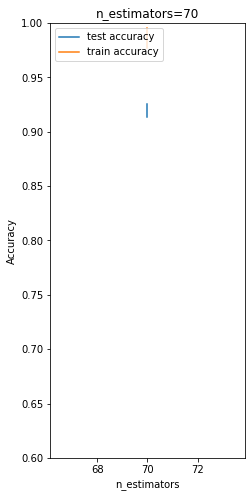

In [126]:
cv_results['param_n_estimators'] = cv_results['param_n_estimators'].astype('int')
# # plotting
plt.figure(figsize=(16,8))

# subplot 1/4
plt.subplot(141)
n_01 = cv_results[cv_results['param_n_estimators']==70]

plt.plot(n_01["param_n_estimators"], n_01["mean_test_score"])
plt.plot(n_01["param_n_estimators"], n_01["mean_train_score"])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title("n_estimators=70")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

# subplot 2/4
plt.subplot(142)
n_01 = cv_results[cv_results['param_n_estimators']==100]

plt.plot(n_01["param_n_estimators"], n_01["mean_test_score"])
plt.plot(n_01["param_n_estimators"], n_01["mean_train_score"])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title("n_estimators=70")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

# subplot 3/4
plt.subplot(142)
n_01 = cv_results[cv_results['param_n_estimators']==150]

plt.plot(n_01["param_n_estimators"], n_01["mean_test_score"])
plt.plot(n_01["param_n_estimators"], n_01["mean_train_score"])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title("n_estimators=70")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

# subplot 4/4
plt.subplot(142)
n_01 = cv_results[cv_results['param_n_estimators']==200]

plt.plot(n_01["param_n_estimators"], n_01["mean_test_score"])
plt.plot(n_01["param_n_estimators"], n_01["mean_train_score"])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title("n_estimators=70")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')